In [19]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [20]:
dl_type1 = pd.read_csv('dl_type1.csv')
dl_type2 = pd.read_csv('dl_type2.csv')
dl_type3 = pd.read_csv('dl_type3.csv')
trad_type1 = pd.read_csv('trad_type1.csv')
trad_type2 = pd.read_csv('trad_type2.csv')
trad_type3 = pd.read_csv('trad_type3.csv')

In [21]:
dl_type1.columns

Index(['repoName', 'classid', 'file', 'startline', 'endline', 'pcid',
       'similarity', 'granularity'],
      dtype='object')

# Unifying block and functions names

In [22]:
def unify_granularity(row):
    if row['granularity'].startswith('blocks'):
        return 'b'
    elif row['granularity'].startswith('function'):
        return 'f'

In [23]:
dl_type1['g']=dl_type1.apply(unify_granularity, axis=1)
dl_type2['g']=dl_type2.apply(unify_granularity, axis=1)
dl_type3['g']=dl_type3.apply(unify_granularity, axis=1)

# Traditional

In [78]:
trad_type1['g']=trad_type1.apply(unify_granularity, axis=1)
trad_type2['g']=trad_type2.apply(unify_granularity, axis=1)
trad_type3['g']=trad_type3.apply(unify_granularity, axis=1)

In [80]:
## Type 1
trad_type1_by_class_files = trad_type1.groupby(['repoName','classid','g','similarity'])['file'].apply(set).reset_index(name='files')
trad_type1_by_class_start = trad_type1.groupby(['repoName','classid','g','similarity'])['startline'].apply(set).reset_index(name='startlines')
trad_type1_by_class_end = trad_type1.groupby(['repoName','classid','g','similarity'])['endline'].apply(set).reset_index(name='endlines')
trad_type1_by_class = pd.merge(trad_type1_by_class_files, trad_type1_by_class_start, how='left', on=['repoName','classid','g','similarity'])
trad_type1_by_class = pd.merge(trad_type1_by_class, trad_type1_by_class_end, how='left', on=['repoName','classid','g','similarity'])

In [81]:
## Type 2
trad_type2_by_class_files = trad_type2.groupby(['repoName','classid','g','similarity'])['file'].apply(set).reset_index(name='files')
trad_type2_by_class_start = trad_type2.groupby(['repoName','classid','g','similarity'])['startline'].apply(set).reset_index(name='startlines')
trad_type2_by_class_end = trad_type2.groupby(['repoName','classid','g','similarity'])['endline'].apply(set).reset_index(name='endlines')
trad_type2_by_class = pd.merge(trad_type2_by_class_files, trad_type2_by_class_start, how='left', on=['repoName','classid','g','similarity'])
trad_type2_by_class = pd.merge(trad_type2_by_class, trad_type2_by_class_end, how='left', on=['repoName','classid','g','similarity'])

In [82]:
## Type 3
trad_type3_by_class_files = trad_type3.groupby(['repoName','classid','g','similarity'])['file'].apply(set).reset_index(name='files')
trad_type3_by_class_start = trad_type3.groupby(['repoName','classid','g','similarity'])['startline'].apply(set).reset_index(name='startlines')
trad_type3_by_class_end = trad_type3.groupby(['repoName','classid','g','similarity'])['endline'].apply(set).reset_index(name='endlines')
trad_type3_by_class = pd.merge(trad_type3_by_class_files, trad_type3_by_class_start, how='left', on=['repoName','classid','g','similarity'])
trad_type3_by_class = pd.merge(trad_type3_by_class, trad_type3_by_class_end, how='left', on=['repoName','classid','g','similarity'])

In [83]:
trad_type2_by_class_clean = trad_type2_by_class
for index2, row2 in trad_type2_by_class_clean.iterrows():
    for index1, row1 in trad_type1_by_class.iterrows():
        if(row1['repoName'] == row2['repoName']) and (row1['g'] == row2['g']) and (row1['similarity'] == row2['similarity']) and (row1['files'] == row2['files']) and (row1['startlines'] == row2['startlines']) and (row1['endlines'] == row2['endlines']):
            trad_type2_by_class_clean = trad_type2_by_class_clean.drop(index2)
            print('{} -- {} -- {}'.format(row1['classid'],row2['classid'],row2['g'] ))

1 -- 1 -- f
2 -- 2 -- f
3 -- 3 -- f
4 -- 5 -- f
5 -- 6 -- f
6 -- 7 -- f
7 -- 8 -- f
1 -- 1 -- f
1 -- 2 -- b
1 -- 1 -- f
2 -- 2 -- f
3 -- 15 -- f
4 -- 16 -- f
7 -- 29 -- f
8 -- 33 -- f
1 -- 1 -- b
2 -- 2 -- b
3 -- 5 -- f
5 -- 8 -- f
6 -- 9 -- f
7 -- 10 -- f
8 -- 22 -- f
13 -- 29 -- f
15 -- 32 -- f
17 -- 39 -- f
1 -- 2 -- b
2 -- 3 -- b
3 -- 12 -- b
4 -- 15 -- b
5 -- 16 -- b
1 -- 16 -- f
6 -- 17 -- b
7 -- 18 -- b
2 -- 18 -- f
3 -- 19 -- f
8 -- 20 -- b
9 -- 29 -- b
4 -- 31 -- f
5 -- 32 -- f
10 -- 33 -- b
11 -- 36 -- b
12 -- 37 -- b
13 -- 39 -- b
14 -- 45 -- b
15 -- 47 -- b
16 -- 58 -- b
6 -- 58 -- f
17 -- 60 -- b
7 -- 62 -- f
19 -- 65 -- b
20 -- 75 -- b
21 -- 76 -- b
8 -- 77 -- f
9 -- 78 -- f
10 -- 79 -- f
23 -- 90 -- b
24 -- 91 -- b
25 -- 92 -- b
26 -- 93 -- b
27 -- 95 -- b
11 -- 96 -- f
12 -- 97 -- f
28 -- 98 -- b
13 -- 98 -- f
29 -- 99 -- b
14 -- 99 -- f
15 -- 100 -- f
16 -- 101 -- f
17 -- 102 -- f
18 -- 103 -- f
19 -- 104 -- f
20 -- 105 -- f
21 -- 106 -- f
22 -- 107 -- f
30 -- 110 -- b

25 -- 102 -- f
26 -- 103 -- f
27 -- 104 -- f
29 -- 106 -- f
48 -- 107 -- b
30 -- 107 -- f
32 -- 110 -- f
33 -- 111 -- f
34 -- 112 -- f
51 -- 114 -- b
35 -- 115 -- f
52 -- 117 -- b
36 -- 117 -- f
53 -- 118 -- b
55 -- 141 -- b
56 -- 146 -- b
57 -- 147 -- b
58 -- 155 -- b
59 -- 156 -- b
60 -- 157 -- b
61 -- 160 -- b
62 -- 161 -- b
65 -- 164 -- b
66 -- 169 -- b
67 -- 172 -- b
71 -- 178 -- b
72 -- 179 -- b
73 -- 180 -- b
74 -- 181 -- b
75 -- 182 -- b
77 -- 187 -- b
78 -- 188 -- b
79 -- 189 -- b
80 -- 191 -- b
1 -- 1 -- b
1 -- 1 -- f
2 -- 2 -- b
2 -- 2 -- f
3 -- 3 -- f
3 -- 4 -- b
4 -- 4 -- f
4 -- 5 -- b
5 -- 5 -- f
6 -- 6 -- f
5 -- 7 -- b
6 -- 8 -- b
7 -- 9 -- b
8 -- 10 -- b
9 -- 11 -- b
10 -- 12 -- b
11 -- 14 -- b
8 -- 29 -- f
9 -- 30 -- f
10 -- 31 -- f
11 -- 32 -- f
14 -- 36 -- b
13 -- 36 -- f
15 -- 37 -- b
16 -- 38 -- b
17 -- 39 -- b
21 -- 44 -- b
22 -- 45 -- b
1 -- 2 -- f
2 -- 3 -- f
3 -- 6 -- f
4 -- 8 -- f
5 -- 10 -- f
6 -- 19 -- f
7 -- 22 -- f
8 -- 23 -- f
9 -- 25 -- f
10 -- 26 -- f
1

109 -- 203 -- f
138 -- 204 -- b
110 -- 204 -- f
111 -- 205 -- f
139 -- 207 -- b
112 -- 207 -- f
140 -- 208 -- b
113 -- 208 -- f
117 -- 214 -- f
118 -- 215 -- f
119 -- 223 -- f
121 -- 227 -- f
122 -- 232 -- f
123 -- 233 -- f
124 -- 234 -- f
1 -- 2 -- b
1 -- 2 -- f
2 -- 3 -- b
2 -- 3 -- f
3 -- 4 -- b
4 -- 5 -- b
3 -- 5 -- f
5 -- 6 -- b
6 -- 9 -- b
7 -- 10 -- b
8 -- 12 -- b
9 -- 13 -- b
10 -- 16 -- b
1 -- 1 -- b
2 -- 3 -- b
3 -- 4 -- b
1 -- 4 -- f
4 -- 5 -- b
5 -- 8 -- b
6 -- 9 -- b
1 -- 13 -- f


In [84]:
trad_type2_by_class_clean['nb_fragment'] = trad_type2_by_class_clean.startlines.apply(lambda x: len(x))

In [85]:
trad_type2_by_class_clean.to_csv('trad_type2_by_class_clean.csv',index=False)

In [90]:
trad_type1_by_class['nb_fragment'] = trad_type1_by_class.startlines.apply(lambda x: len(x))

In [91]:
trad_type1_by_class.to_csv('trad_type1_by_class_clean.csv',index=False)

In [86]:
trad_type3_by_class_clean = trad_type3_by_class
for index3, row3 in trad_type3_by_class_clean.iterrows():
    for index2, row2 in trad_type2_by_class.iterrows():
        if(row3['repoName'] == row2['repoName']) and (row3['g'] == row2['g']) and (row3['similarity'] == row2['similarity']) and (row3['files'] == row2['files']) and (row3['startlines'] == row2['startlines']) and (row3['endlines'] == row2['endlines']):
            trad_type3_by_class_clean = trad_type3_by_class_clean.drop(index3)
            print('{} -- {} -- {}'.format(row3['classid'],row2['classid'],index3 ))

1 -- 1 -- 1
1 -- 1 -- 3
6 -- 3 -- 13
7 -- 4 -- 15
10 -- 7 -- 21
13 -- 10 -- 27
13 -- 2 -- 121
7 -- 1 -- 146
9 -- 2 -- 150
10 -- 3 -- 152
25 -- 6 -- 182
28 -- 7 -- 186
38 -- 11 -- 196
42 -- 14 -- 200
49 -- 16 -- 207
52 -- 17 -- 210
60 -- 22 -- 218
75 -- 26 -- 233
79 -- 29 -- 237
81 -- 30 -- 239
92 -- 37 -- 250
110 -- 41 -- 268
8 -- 1 -- 285
7 -- 5 -- 301
21 -- 14 -- 315
25 -- 16 -- 319
26 -- 17 -- 320
28 -- 18 -- 322
29 -- 21 -- 323
56 -- 34 -- 350
63 -- 38 -- 357
72 -- 42 -- 366
20 -- 2 -- 406
27 -- 7 -- 420
38 -- 16 -- 442
64 -- 24 -- 493
68 -- 28 -- 502
75 -- 29 -- 515
76 -- 30 -- 517
77 -- 31 -- 519
82 -- 32 -- 530
85 -- 33 -- 536
91 -- 36 -- 547
103 -- 37 -- 572
111 -- 41 -- 588
113 -- 48 -- 591
113 -- 43 -- 592
114 -- 44 -- 594
118 -- 52 -- 601
122 -- 56 -- 609
124 -- 48 -- 614
140 -- 52 -- 646
153 -- 53 -- 672
155 -- 55 -- 676
157 -- 67 -- 679
160 -- 69 -- 685
181 -- 57 -- 728
189 -- 70 -- 743
193 -- 59 -- 752
201 -- 72 -- 767
226 -- 61 -- 818
227 -- 62 -- 820
230 -- 74 -- 825
23

40 -- 14 -- 4532
5 -- 1 -- 4574
6 -- 2 -- 4575
12 -- 3 -- 4587
3 -- 1 -- 4622
7 -- 3 -- 4630
23 -- 6 -- 4651
49 -- 12 -- 4677
50 -- 13 -- 4678
51 -- 14 -- 4679
52 -- 15 -- 4680
57 -- 17 -- 4685
6 -- 3 -- 4699
8 -- 5 -- 4703
9 -- 8 -- 4705
23 -- 10 -- 4733
24 -- 12 -- 4735
25 -- 13 -- 4737
26 -- 13 -- 4738
28 -- 14 -- 4742
32 -- 16 -- 4750
33 -- 17 -- 4752
37 -- 18 -- 4760
40 -- 16 -- 4767
48 -- 25 -- 4783
60 -- 35 -- 4807
66 -- 36 -- 4819
70 -- 29 -- 4826
73 -- 32 -- 4832
75 -- 46 -- 4837
81 -- 40 -- 4848
87 -- 42 -- 4860
89 -- 43 -- 4864
96 -- 46 -- 4878
97 -- 47 -- 4880
101 -- 65 -- 4889
102 -- 50 -- 4890
105 -- 53 -- 4896
106 -- 54 -- 4898
108 -- 71 -- 4903
110 -- 73 -- 4907
111 -- 59 -- 4908
115 -- 76 -- 4917
116 -- 63 -- 4918
117 -- 77 -- 4921
118 -- 79 -- 4923
121 -- 66 -- 4928
122 -- 83 -- 4931
124 -- 67 -- 4934
128 -- 70 -- 4942
130 -- 74 -- 4946
130 -- 89 -- 4947
132 -- 90 -- 4951
135 -- 77 -- 4956
138 -- 91 -- 4963
139 -- 92 -- 4965
144 -- 78 -- 4974
147 -- 96 -- 4981
151 -- 

405 -- 131 -- 8608
407 -- 132 -- 8612
408 -- 144 -- 8615
410 -- 133 -- 8618
412 -- 145 -- 8623
415 -- 136 -- 8628
415 -- 146 -- 8629
426 -- 138 -- 8650
427 -- 139 -- 8652
441 -- 146 -- 8680
447 -- 162 -- 8693
453 -- 153 -- 8704
453 -- 164 -- 8705
458 -- 156 -- 8714
458 -- 165 -- 8715
461 -- 159 -- 8720
465 -- 160 -- 8728
465 -- 167 -- 8729
477 -- 174 -- 8752
477 -- 193 -- 8753
478 -- 194 -- 8755
482 -- 177 -- 8762
482 -- 202 -- 8763
483 -- 203 -- 8765
484 -- 204 -- 8767
485 -- 205 -- 8769
486 -- 206 -- 8771
490 -- 209 -- 8779
491 -- 210 -- 8781
492 -- 211 -- 8783
498 -- 184 -- 8794
506 -- 224 -- 8811
512 -- 189 -- 8822
513 -- 227 -- 8825
515 -- 228 -- 8829
522 -- 193 -- 8842
525 -- 236 -- 8849
529 -- 237 -- 8857
533 -- 200 -- 8862
546 -- 205 -- 8875
6 -- 1 -- 8888
6 -- 1 -- 8889
15 -- 6 -- 8906
16 -- 3 -- 8909
24 -- 9 -- 8924
30 -- 6 -- 8937
32 -- 7 -- 8941
1 -- 1 -- 8954
8 -- 2 -- 8968
13 -- 2 -- 8977
54 -- 5 -- 9059
56 -- 4 -- 9064
67 -- 8 -- 9082
5 -- 4 -- 9094
20 -- 13 -- 9109
21 -

In [87]:
trad_type3_by_class_clean['nb_fragment'] = trad_type3_by_class_clean.startlines.apply(lambda x: len(x))

In [88]:
trad_type3_by_class_clean.to_csv('trad_type3_by_class_clean.csv',index=False)

# Compare classes and clean types

In [24]:
type1_by_class_files = dl_type1.groupby(['repoName','classid','g','similarity'])['file'].apply(set).reset_index(name='files')

In [25]:
type1_by_class_start = dl_type1.groupby(['repoName','classid','g','similarity'])['startline'].apply(set).reset_index(name='startlines')

In [26]:
type1_by_class_end = dl_type1.groupby(['repoName','classid','g','similarity'])['endline'].apply(set).reset_index(name='endlines')

In [27]:
type1_by_class = pd.merge(type1_by_class_files, type1_by_class_start, how='left', on=['repoName','classid','g','similarity'])

In [28]:
type1_by_class = pd.merge(type1_by_class, type1_by_class_end, how='left', on=['repoName','classid','g','similarity'])

In [29]:
type1_by_class

,repoName,classid,g,similarity,files,startlines,endlines
0,BerryNet,1,b,100,{../clone_code/dl/BerryNet/utils/snapshot-butt...,"{58, 21}","{24, 61}"
1,BerryNet,1,f,100,{../clone_code/dl/BerryNet/utils/snapshot-butt...,"{8, 11}","{11, 14}"
2,BerryNet,2,b,100,{../clone_code/dl/BerryNet/inference/detect_mo...,"{66, 67, 68, 108, 76, 61}","{69, 70, 78, 110, 63}"
3,BerryNet,2,f,100,{../clone_code/dl/BerryNet/utils/snapshot-butt...,"{57, 20}","{24, 61}"
4,BerryNet,3,b,100,{../clone_code/dl/BerryNet/inference/detect_mo...,"{132, 104, 215, 121, 156}","{235, 142, 177, 153, 125}"
...,...,...,...,...,...,...,...
3089,waifu2x-chainer,2,f,100,{../clone_code/dl/waifu2x-chainer/lib/srcnn.py...,"{147, 116}","{128, 159}"
3090,waifu2x-chainer,3,b,100,{../clone_code/dl/waifu2x-chainer/lib/srcnn.py...,"{148, 117}","{128, 159}"
3091,waifu2x-chainer,4,b,100,{../clone_code/dl/waifu2x-chainer/lib/dataset_...,"{61, 54}","{57, 63}"
3092,waifu2x-chainer,5,b,100,{../clone_code/dl/waifu2x-chainer/appendix/ben...,"{104, 75}","{107, 79}"


In [74]:
type1_by_class['nb_fragment'] = type1_by_class.startlines.apply(lambda x: len(x))

In [75]:
type1_by_class.to_csv('type1_by_class.csv',index=False)

In [30]:
## Type 2
type2_by_class_files = dl_type2.groupby(['repoName','classid','g','similarity'])['file'].apply(set).reset_index(name='files')
type2_by_class_start = dl_type2.groupby(['repoName','classid','g','similarity'])['startline'].apply(set).reset_index(name='startlines')
type2_by_class_end = dl_type2.groupby(['repoName','classid','g','similarity'])['endline'].apply(set).reset_index(name='endlines')
type2_by_class = pd.merge(type2_by_class_files, type2_by_class_start, how='left', on=['repoName','classid','g','similarity'])
type2_by_class = pd.merge(type2_by_class, type2_by_class_end, how='left', on=['repoName','classid','g','similarity'])

In [31]:
type2_by_class.loc[type2_by_class.astype(str).drop_duplicates().index]

,repoName,classid,g,similarity,files,startlines,endlines
0,BerryNet,1,b,100,{../clone_code/dl/BerryNet/utils/snapshot-butt...,"{58, 21}","{24, 61}"
1,BerryNet,1,f,100,{../clone_code/dl/BerryNet/utils/snapshot-butt...,"{8, 11}","{11, 14}"
2,BerryNet,2,b,100,{../clone_code/dl/BerryNet/inference/detect_mo...,"{66, 67, 68, 108, 76, 61}","{69, 70, 78, 110, 63}"
3,BerryNet,2,f,100,{../clone_code/dl/BerryNet/utils/demo.py.pyind...,"{32, 28}","{35, 31}"
4,BerryNet,3,b,100,{../clone_code/dl/BerryNet/inference/detect_mo...,"{128, 132, 104, 215, 121, 156}","{235, 142, 177, 149, 153, 125}"
...,...,...,...,...,...,...,...
3489,waifu2x-chainer,2,f,100,{../clone_code/dl/waifu2x-chainer/lib/srcnn.py...,"{147, 116}","{128, 159}"
3490,waifu2x-chainer,3,b,100,{../clone_code/dl/waifu2x-chainer/lib/srcnn.py...,"{148, 117}","{128, 159}"
3491,waifu2x-chainer,4,b,100,{../clone_code/dl/waifu2x-chainer/lib/dataset_...,"{61, 54}","{57, 63}"
3492,waifu2x-chainer,5,b,100,{../clone_code/dl/waifu2x-chainer/appendix/ben...,"{104, 75}","{107, 79}"


In [32]:
type2_by_class

,repoName,classid,g,similarity,files,startlines,endlines
0,BerryNet,1,b,100,{../clone_code/dl/BerryNet/utils/snapshot-butt...,"{58, 21}","{24, 61}"
1,BerryNet,1,f,100,{../clone_code/dl/BerryNet/utils/snapshot-butt...,"{8, 11}","{11, 14}"
2,BerryNet,2,b,100,{../clone_code/dl/BerryNet/inference/detect_mo...,"{66, 67, 68, 108, 76, 61}","{69, 70, 78, 110, 63}"
3,BerryNet,2,f,100,{../clone_code/dl/BerryNet/utils/demo.py.pyind...,"{32, 28}","{35, 31}"
4,BerryNet,3,b,100,{../clone_code/dl/BerryNet/inference/detect_mo...,"{128, 132, 104, 215, 121, 156}","{235, 142, 177, 149, 153, 125}"
...,...,...,...,...,...,...,...
3489,waifu2x-chainer,2,f,100,{../clone_code/dl/waifu2x-chainer/lib/srcnn.py...,"{147, 116}","{128, 159}"
3490,waifu2x-chainer,3,b,100,{../clone_code/dl/waifu2x-chainer/lib/srcnn.py...,"{148, 117}","{128, 159}"
3491,waifu2x-chainer,4,b,100,{../clone_code/dl/waifu2x-chainer/lib/dataset_...,"{61, 54}","{57, 63}"
3492,waifu2x-chainer,5,b,100,{../clone_code/dl/waifu2x-chainer/appendix/ben...,"{104, 75}","{107, 79}"


In [40]:
#Comparing between 2 et 1
{58, 21} == {58, 21}

True

In [49]:
matching_class = pd.DataFrame()
for index2, row2 in type2_by_class.iterrows():
    for index1, row1 in type1_by_class.iterrows():
        if(row1['repoName'] == row2['repoName']) and (row1['g'] == row2['g']) and (row1['similarity'] == row2['similarity']) and (row1['files'] == row2['files']) and (row1['startlines'] == row2['startlines']) and (row1['endlines'] == row2['endlines']):
            #row2['classid_match'] = row1['classid']
            matching_class['class_id_1']=row1['classid']
            matching_class['class_id_2']=row2['classid']
            matching_class['g_1']=row1['g']
            matching_class['g_2']=row2['g']
            print('{} -- {} -- {}'.format(row1['classid'],row2['classid'],row2['g'] ))

1 -- 1 -- b
1 -- 1 -- f
2 -- 2 -- b
2 -- 3 -- f
4 -- 4 -- b
3 -- 4 -- f
5 -- 5 -- b
6 -- 6 -- b
5 -- 6 -- f
7 -- 7 -- b
6 -- 7 -- f
8 -- 8 -- b
7 -- 8 -- f
9 -- 9 -- b
8 -- 9 -- f
10 -- 10 -- b
9 -- 10 -- f
11 -- 11 -- b
10 -- 11 -- f
12 -- 12 -- b
11 -- 12 -- f
13 -- 13 -- b
12 -- 13 -- f
14 -- 14 -- b
13 -- 14 -- f
15 -- 15 -- b
16 -- 16 -- b
14 -- 16 -- f
15 -- 17 -- f
17 -- 18 -- b
16 -- 18 -- f
18 -- 19 -- b
17 -- 19 -- f
19 -- 20 -- b
18 -- 20 -- f
19 -- 21 -- f
20 -- 22 -- b
20 -- 22 -- f
21 -- 23 -- b
21 -- 23 -- f
22 -- 24 -- b
22 -- 24 -- f
23 -- 25 -- b
23 -- 25 -- f
24 -- 26 -- b
24 -- 28 -- f
25 -- 29 -- b
25 -- 29 -- f
26 -- 33 -- b
27 -- 35 -- b
28 -- 36 -- b
1 -- 1 -- b
1 -- 2 -- f
2 -- 3 -- b
2 -- 3 -- f
3 -- 4 -- b
3 -- 4 -- f
4 -- 5 -- b
4 -- 5 -- f
5 -- 6 -- b
5 -- 6 -- f
6 -- 7 -- b
6 -- 7 -- f
7 -- 8 -- b
7 -- 8 -- f
8 -- 9 -- b
8 -- 9 -- f
9 -- 10 -- b
10 -- 11 -- b
11 -- 12 -- b
12 -- 13 -- b
13 -- 14 -- b
14 -- 15 -- b
15 -- 16 -- b
16 -- 17 -- b
17 -- 18 -- b


KeyboardInterrupt: 

In [51]:
type2_by_class_clean = type2_by_class
for index2, row2 in type2_by_class_clean.iterrows():
    for index1, row1 in type1_by_class.iterrows():
        if(row1['repoName'] == row2['repoName']) and (row1['g'] == row2['g']) and (row1['similarity'] == row2['similarity']) and (row1['files'] == row2['files']) and (row1['startlines'] == row2['startlines']) and (row1['endlines'] == row2['endlines']):
            type2_by_class_clean = type2_by_class_clean.drop(index2)
            print('{} -- {} -- {}'.format(row1['classid'],row2['classid'],row2['g'] ))

1 -- 1 -- b
1 -- 1 -- f
2 -- 2 -- b
2 -- 3 -- f
4 -- 4 -- b
3 -- 4 -- f
5 -- 5 -- b
6 -- 6 -- b
5 -- 6 -- f
7 -- 7 -- b
6 -- 7 -- f
8 -- 8 -- b
7 -- 8 -- f
9 -- 9 -- b
8 -- 9 -- f
10 -- 10 -- b
9 -- 10 -- f
11 -- 11 -- b
10 -- 11 -- f
12 -- 12 -- b
11 -- 12 -- f
13 -- 13 -- b
12 -- 13 -- f
14 -- 14 -- b
13 -- 14 -- f
15 -- 15 -- b
16 -- 16 -- b
14 -- 16 -- f
15 -- 17 -- f
17 -- 18 -- b
16 -- 18 -- f
18 -- 19 -- b
17 -- 19 -- f
19 -- 20 -- b
18 -- 20 -- f
19 -- 21 -- f
20 -- 22 -- b
20 -- 22 -- f
21 -- 23 -- b
21 -- 23 -- f
22 -- 24 -- b
22 -- 24 -- f
23 -- 25 -- b
23 -- 25 -- f
24 -- 26 -- b
24 -- 28 -- f
25 -- 29 -- b
25 -- 29 -- f
26 -- 33 -- b
27 -- 35 -- b
28 -- 36 -- b
1 -- 1 -- b
1 -- 2 -- f
2 -- 3 -- b
2 -- 3 -- f
3 -- 4 -- b
3 -- 4 -- f
4 -- 5 -- b
4 -- 5 -- f
5 -- 6 -- b
5 -- 6 -- f
6 -- 7 -- b
6 -- 7 -- f
7 -- 8 -- b
7 -- 8 -- f
8 -- 9 -- b
8 -- 9 -- f
9 -- 10 -- b
10 -- 11 -- b
11 -- 12 -- b
12 -- 13 -- b
13 -- 14 -- b
14 -- 15 -- b
15 -- 16 -- b
16 -- 17 -- b
17 -- 18 -- b


39 -- 72 -- b
40 -- 73 -- b
23 -- 73 -- f
24 -- 79 -- f
25 -- 80 -- f
26 -- 83 -- f
27 -- 87 -- f
41 -- 88 -- b
28 -- 88 -- f
42 -- 90 -- b
43 -- 91 -- b
29 -- 91 -- f
30 -- 92 -- f
31 -- 93 -- f
32 -- 94 -- f
33 -- 95 -- f
34 -- 96 -- f
35 -- 97 -- f
36 -- 98 -- f
37 -- 99 -- f
38 -- 100 -- f
39 -- 102 -- f
40 -- 103 -- f
41 -- 104 -- f
44 -- 105 -- b
45 -- 106 -- b
46 -- 107 -- b
47 -- 109 -- b
48 -- 110 -- b
49 -- 111 -- b
50 -- 116 -- b
51 -- 117 -- b
52 -- 119 -- b
53 -- 120 -- b
54 -- 121 -- b
55 -- 131 -- b
56 -- 133 -- b
57 -- 134 -- b
58 -- 135 -- b
59 -- 136 -- b
60 -- 138 -- b
61 -- 139 -- b
62 -- 140 -- b
63 -- 141 -- b
65 -- 145 -- b
66 -- 146 -- b
67 -- 147 -- b
68 -- 148 -- b
69 -- 151 -- b
73 -- 154 -- b
74 -- 155 -- b
75 -- 156 -- b
76 -- 157 -- b
77 -- 158 -- b
78 -- 159 -- b
79 -- 162 -- b
80 -- 170 -- b
82 -- 173 -- b
84 -- 175 -- b
85 -- 176 -- b
86 -- 177 -- b
87 -- 178 -- b
88 -- 179 -- b
89 -- 185 -- b
1 -- 2 -- f
2 -- 4 -- f
3 -- 5 -- f
1 -- 3 -- f
1 -- 4 -- b


1 -- 1 -- f
2 -- 2 -- f
3 -- 3 -- f
4 -- 7 -- f
5 -- 8 -- f
6 -- 9 -- f
7 -- 10 -- f
8 -- 11 -- f
9 -- 12 -- f
10 -- 13 -- f
11 -- 14 -- f
12 -- 16 -- f
13 -- 19 -- f
15 -- 27 -- f
16 -- 30 -- f
18 -- 35 -- f
19 -- 36 -- f
20 -- 37 -- f
21 -- 39 -- f
22 -- 41 -- f
23 -- 42 -- f
24 -- 43 -- f
25 -- 44 -- f
26 -- 45 -- f
27 -- 48 -- f
28 -- 49 -- f
29 -- 50 -- f
30 -- 51 -- f
31 -- 52 -- f
32 -- 53 -- f
33 -- 55 -- f
34 -- 57 -- f
35 -- 60 -- f
36 -- 61 -- f
37 -- 62 -- f
38 -- 63 -- f
39 -- 64 -- f
40 -- 67 -- f
41 -- 68 -- f
42 -- 69 -- f
43 -- 70 -- f
44 -- 71 -- f
45 -- 72 -- f
46 -- 74 -- f
47 -- 75 -- f
48 -- 76 -- f
49 -- 78 -- f
50 -- 79 -- f
51 -- 82 -- f
52 -- 83 -- f
53 -- 84 -- f
54 -- 89 -- f
55 -- 92 -- f
56 -- 104 -- f
57 -- 105 -- f
58 -- 106 -- f
59 -- 107 -- f
60 -- 110 -- f
62 -- 111 -- f
65 -- 113 -- f
66 -- 114 -- f
67 -- 115 -- f
68 -- 116 -- f
69 -- 117 -- f
70 -- 118 -- f
71 -- 119 -- f
72 -- 120 -- f
73 -- 121 -- f
75 -- 123 -- f
76 -- 124 -- f
77 -- 125 -- f
78 

In [52]:
type2_by_class_clean

,repoName,classid,g,similarity,files,startlines,endlines
3,BerryNet,2,f,100,{../clone_code/dl/BerryNet/utils/demo.py.pyind...,"{32, 28}","{35, 31}"
4,BerryNet,3,b,100,{../clone_code/dl/BerryNet/inference/detect_mo...,"{128, 132, 104, 215, 121, 156}","{235, 142, 177, 149, 153, 125}"
9,BerryNet,5,f,100,{../clone_code/dl/BerryNet/inference/detect_mo...,"{128, 132, 104, 215, 121, 156}","{232, 138, 173, 145, 149, 121}"
29,BerryNet,15,f,100,{../clone_code/dl/BerryNet/inference/movidius....,"{274, 157}","{288, 171}"
32,BerryNet,17,b,100,{../clone_code/dl/BerryNet/inference/movidius....,"{275, 158}","{288, 171}"
...,...,...,...,...,...,...,...
3471,tflearn,36,b,100,{../clone_code/dl/tflearn/tflearn/layers/conv....,"{1464, 1438}","{1488, 1462}"
3476,tflearn,41,b,100,{../clone_code/dl/tflearn/tflearn/layers/recur...,"{677, 685}","{681, 689}"
3481,tflearn,46,b,100,{../clone_code/dl/tflearn/tflearn/estimators/e...,"{338, 410}","{344, 415}"
3482,tflearn,47,b,100,{../clone_code/dl/tflearn/tflearn/estimators/c...,"{88, 81, 102, 95}","{99, 107, 92, 85}"


In [76]:
type2_by_class_clean.to_csv('type2_by_class_clean.csv',index=False)

In [58]:
type2_by_class_clean['files'] = type2_by_class_clean['files'].apply(list)
type2_by_class_clean['startlines'] = type2_by_class_clean['startlines'].apply(list)
type2_by_class_clean['endlines'] = type2_by_class_clean['endlines'].apply(list)

In [55]:
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [60]:
type2_by_class_clean

,repoName,classid,g,similarity,files,startlines,endlines
3,BerryNet,2,f,100,[../clone_code/dl/BerryNet/utils/demo.py.pyind...,"[32, 28]","[35, 31]"
4,BerryNet,3,b,100,[../clone_code/dl/BerryNet/inference/detect_mo...,"[128, 132, 104, 215, 121, 156]","[235, 142, 177, 149, 153, 125]"
9,BerryNet,5,f,100,[../clone_code/dl/BerryNet/inference/detect_mo...,"[128, 132, 104, 215, 121, 156]","[232, 138, 173, 145, 149, 121]"
29,BerryNet,15,f,100,[../clone_code/dl/BerryNet/inference/movidius....,"[274, 157]","[288, 171]"
32,BerryNet,17,b,100,[../clone_code/dl/BerryNet/inference/movidius....,"[275, 158]","[288, 171]"
...,...,...,...,...,...,...,...
3471,tflearn,36,b,100,[../clone_code/dl/tflearn/tflearn/layers/conv....,"[1464, 1438]","[1488, 1462]"
3476,tflearn,41,b,100,[../clone_code/dl/tflearn/tflearn/layers/recur...,"[677, 685]","[681, 689]"
3481,tflearn,46,b,100,[../clone_code/dl/tflearn/tflearn/estimators/e...,"[338, 410]","[344, 415]"
3482,tflearn,47,b,100,[../clone_code/dl/tflearn/tflearn/estimators/c...,"[88, 81, 102, 95]","[99, 107, 92, 85]"


In [ ]:
type2_by_class_clean_f = explode(type2_by_class_clean, ['startlines','endlines'])

In [67]:
type2_by_class_clean['nb_fragment'] = type2_by_class_clean.startlines.apply(lambda x: len(x))

In [68]:
type2_by_class_clean

,repoName,classid,g,similarity,files,startlines,endlines,nb_fragment
3,BerryNet,2,f,100,[../clone_code/dl/BerryNet/utils/demo.py.pyind...,"[32, 28]","[35, 31]",2
4,BerryNet,3,b,100,[../clone_code/dl/BerryNet/inference/detect_mo...,"[128, 132, 104, 215, 121, 156]","[235, 142, 177, 149, 153, 125]",6
9,BerryNet,5,f,100,[../clone_code/dl/BerryNet/inference/detect_mo...,"[128, 132, 104, 215, 121, 156]","[232, 138, 173, 145, 149, 121]",6
29,BerryNet,15,f,100,[../clone_code/dl/BerryNet/inference/movidius....,"[274, 157]","[288, 171]",2
32,BerryNet,17,b,100,[../clone_code/dl/BerryNet/inference/movidius....,"[275, 158]","[288, 171]",2
...,...,...,...,...,...,...,...,...
3471,tflearn,36,b,100,[../clone_code/dl/tflearn/tflearn/layers/conv....,"[1464, 1438]","[1488, 1462]",2
3476,tflearn,41,b,100,[../clone_code/dl/tflearn/tflearn/layers/recur...,"[677, 685]","[681, 689]",2
3481,tflearn,46,b,100,[../clone_code/dl/tflearn/tflearn/estimators/e...,"[338, 410]","[344, 415]",2
3482,tflearn,47,b,100,[../clone_code/dl/tflearn/tflearn/estimators/c...,"[88, 81, 102, 95]","[99, 107, 92, 85]",4


In [15]:
type1_by_class_without_class = type1_by_class[['repoName','g','similarity','files','startlines','endlines']]
type2_by_class_without_class = type2_by_class[['repoName','g','similarity','files','startlines','endlines']]
type2_clean = pd.concat([type1_by_class_without_class, type2_by_class_without_class], ignore_index=True)

In [16]:
type2_clean.dtypes

repoName      object
g             object
similarity     int64
files         object
startlines    object
endlines      object
dtype: object

In [17]:
type2_clean = type2_clean.loc[type2_clean.astype(str).drop_duplicates().index]

In [ ]:
dl_t2_clean = type2_by_class.loc[type2_by_class.astype(str).index].merge(type2_clean,indicator = True, how='left')

In [17]:
dl_type1['nb_fragment']=1
clone_by_proj = all_clone.groupby(['repoName','type']).agg({'clone_occs':'sum'}).reset_index()

In [22]:
dl_type1.groupby(['repoName','classid','granularity','similarity']).agg({'nb_fragment':'sum'}).reset_index()


,repoName,classid,granularity,similarity,nb_fragment
0,BerryNet,1,blocks,100,2
1,BerryNet,1,functions,100,2
2,BerryNet,2,blocks,100,7
3,BerryNet,2,functions,100,2
4,BerryNet,3,blocks,100,5
...,...,...,...,...,...
3089,waifu2x-chainer,2,functions,100,2
3090,waifu2x-chainer,3,blocks,100,2
3091,waifu2x-chainer,4,blocks,100,2
3092,waifu2x-chainer,5,blocks,100,2


In [4]:
dl_type1

,repoName,classid,file,startline,endline,pcid,similarity,granularity
0,adanet,1,../clone_code/dl/adanet/adanet/ensemble/ensemb...,29,48,73,100,blocks
1,adanet,1,../clone_code/dl/adanet/adanet/subnetwork/gene...,42,61,695,100,blocks
2,adanet,2,../clone_code/dl/adanet/adanet/core/evaluator_...,121,126,204,100,blocks
3,adanet,2,../clone_code/dl/adanet/adanet/core/evaluator_...,140,145,208,100,blocks
4,adanet,3,../clone_code/dl/adanet/adanet/core/testing_ut...,43,49,477,100,blocks
...,...,...,...,...,...,...,...,...
7942,waifu2x-chainer,6,../clone_code/dl/waifu2x-chainer/appendix/benc...,81,84,215,100,blocks
7943,waifu2x-chainer,1,../clone_code/dl/waifu2x-chainer/lib/srcnn.py....,23,33,29,100,functions
7944,waifu2x-chainer,1,../clone_code/dl/waifu2x-chainer/lib/srcnn.py....,51,61,31,100,functions
7945,waifu2x-chainer,2,../clone_code/dl/waifu2x-chainer/lib/srcnn.py....,116,128,35,100,functions


In [26]:
{'1','2'} == {'2','1'}
type({'1','2'})

set

In [4]:
dl_type1

,repoName,classid,file,startline,endline,pcid,similarity,granularity
0,adanet,1,../clone_code/dl/adanet/adanet/ensemble/ensemb...,29,48,73,100,blocks
1,adanet,1,../clone_code/dl/adanet/adanet/subnetwork/gene...,42,61,695,100,blocks
2,adanet,2,../clone_code/dl/adanet/adanet/core/evaluator_...,121,126,204,100,blocks
3,adanet,2,../clone_code/dl/adanet/adanet/core/evaluator_...,140,145,208,100,blocks
4,adanet,3,../clone_code/dl/adanet/adanet/core/testing_ut...,43,49,477,100,blocks
...,...,...,...,...,...,...,...,...
7942,waifu2x-chainer,6,../clone_code/dl/waifu2x-chainer/appendix/benc...,81,84,215,100,blocks
7943,waifu2x-chainer,1,../clone_code/dl/waifu2x-chainer/lib/srcnn.py....,23,33,29,100,functions
7944,waifu2x-chainer,1,../clone_code/dl/waifu2x-chainer/lib/srcnn.py....,51,61,31,100,functions
7945,waifu2x-chainer,2,../clone_code/dl/waifu2x-chainer/lib/srcnn.py....,116,128,35,100,functions


# Data preprocessing
Search type 1 in type 2 and delete them, Search type 2 in type 3 and delete them

## Clean Type2

In [128]:
dl_t2 = dl_type2[['repoName','file', 'startline', 'endline', 'similarity']]

In [129]:
dl_t1 = dl_type1[['repoName','file', 'startline', 'endline', 'similarity']]

In [130]:
dl_t2_clean = dl_t2.merge(dl_t1,indicator = True, how='left')

In [131]:
dl_type2_clean = dl_t2_clean[dl_t2_clean['_merge']=='left_only']

In [132]:
dl_type2_clean = dl_type2_clean.drop(columns="_merge")

In [133]:
trad_t2 = trad_type2[['repoName','file', 'startline', 'endline', 'similarity']]
trad_t1 = trad_type1[['repoName','file', 'startline', 'endline', 'similarity']]
trad_t2_clean = trad_t2.merge(trad_t1,indicator = True, how='left')
trad_type2_clean = trad_t2_clean[trad_t2_clean['_merge']=='left_only']
trad_type2_clean = trad_type2_clean.drop(columns="_merge")

In [134]:
trad_type2_clean


,repoName,file,startline,endline,similarity
0,ajenti,../clone_code/trad/ajenti/ajenti/api/sensors.p...,15,18,100
1,ajenti,../clone_code/trad/ajenti/ajenti/plugins/netwo...,33,36,100
2,ajenti,../clone_code/trad/ajenti/ajenti/plugins/netwo...,62,65,100
3,ajenti,../clone_code/trad/ajenti/ajenti/api/__init__....,100,110,100
4,ajenti,../clone_code/trad/ajenti/ajenti/api/__init__....,142,152,100
...,...,...,...,...,...
9261,yowsup,../clone_code/trad/yowsup/yowsup/layers/protoc...,13,15,100
9262,yowsup,../clone_code/trad/yowsup/yowsup/layers/axolot...,99,112,100
9263,yowsup,../clone_code/trad/yowsup/yowsup/layers/axolot...,113,127,100
9264,yowsup,../clone_code/trad/yowsup/yowsup/layers/axolot...,80,83,100


In [135]:
trad_type2

,repoName,classid,file,startline,endline,pcid,similarity,granularity
0,ajenti,1,../clone_code/trad/ajenti/ajenti/api/sensors.p...,15,18,18,100,functions-blind
1,ajenti,1,../clone_code/trad/ajenti/ajenti/plugins/netwo...,33,36,1266,100,functions-blind
2,ajenti,1,../clone_code/trad/ajenti/ajenti/plugins/netwo...,62,65,1269,100,functions-blind
3,ajenti,2,../clone_code/trad/ajenti/ajenti/api/__init__....,100,110,30,100,functions-blind
4,ajenti,2,../clone_code/trad/ajenti/ajenti/api/__init__....,142,152,34,100,functions-blind
...,...,...,...,...,...,...,...,...
9213,yowsup,40,../clone_code/trad/yowsup/yowsup/layers/protoc...,13,15,1416,100,functions-blind
9214,yowsup,41,../clone_code/trad/yowsup/yowsup/layers/axolot...,99,112,1526,100,functions-blind
9215,yowsup,41,../clone_code/trad/yowsup/yowsup/layers/axolot...,113,127,1527,100,functions-blind
9216,yowsup,42,../clone_code/trad/yowsup/yowsup/layers/axolot...,80,83,1562,100,functions-blind


In [136]:
trad_type2_clean.merge(trad_type2, how='left').drop_duplicates()

,repoName,file,startline,endline,similarity,classid,pcid,granularity
0,ajenti,../clone_code/trad/ajenti/ajenti/api/sensors.p...,15,18,100,1,18,functions-blind
1,ajenti,../clone_code/trad/ajenti/ajenti/plugins/netwo...,33,36,100,1,1266,functions-blind
2,ajenti,../clone_code/trad/ajenti/ajenti/plugins/netwo...,62,65,100,1,1269,functions-blind
3,ajenti,../clone_code/trad/ajenti/ajenti/api/__init__....,100,110,100,2,30,functions-blind
4,ajenti,../clone_code/trad/ajenti/ajenti/api/__init__....,142,152,100,2,34,functions-blind
...,...,...,...,...,...,...,...,...
5947,yowsup,../clone_code/trad/yowsup/yowsup/layers/protoc...,13,15,100,40,1416,functions-blind
5948,yowsup,../clone_code/trad/yowsup/yowsup/layers/axolot...,99,112,100,41,1526,functions-blind
5949,yowsup,../clone_code/trad/yowsup/yowsup/layers/axolot...,113,127,100,41,1527,functions-blind
5950,yowsup,../clone_code/trad/yowsup/yowsup/layers/axolot...,80,83,100,42,1562,functions-blind


In [137]:
trad_type2_clean['similarity'].nunique()

1

In [138]:
dl_type2_clean

,repoName,file,startline,endline,similarity
2,adanet,../clone_code/dl/adanet/adanet/core/estimator_...,197,202,100
3,adanet,../clone_code/dl/adanet/adanet/core/estimator_...,90,95,100
4,adanet,../clone_code/dl/adanet/adanet/core/summary.py...,297,311,100
5,adanet,../clone_code/dl/adanet/adanet/core/summary.py...,328,342,100
6,adanet,../clone_code/dl/adanet/adanet/core/summary.py...,567,570,100
...,...,...,...,...,...
9091,tflearn,../clone_code/dl/tflearn/tflearn/estimators/cl...,94,99,100
9092,tflearn,../clone_code/dl/tflearn/tflearn/estimators/cl...,87,92,100
9093,tflearn,../clone_code/dl/tflearn/tflearn/estimators/cl...,101,107,100
9094,tflearn,../clone_code/dl/tflearn/docs/autodoc.py.pyindent,183,190,100


## Clean type 3

In [20]:
trad_type3_clean['similarity'].unique()

array([ 84,  83,  75,  78,  70,  71,  80,  72,  85,  92,  73,  77,  88,
        90,  76,  79,  86,  82,  81,  87,  91,  74,  95,  93,  94,  89,
        98,  96, 100,  97,  99], dtype=int64)

In [16]:
# From type 1
dl_t3 = dl_type3[['repoName','file', 'startline', 'endline', 'similarity']]
dl_t1 = dl_type1[['repoName','file', 'startline', 'endline', 'similarity']]
dl_t3_clean = dl_t3.merge(dl_t1,indicator = True, how='left')
dl_type3_clean = dl_t3_clean[dl_t3_clean['_merge']=='left_only']
dl_type3_clean = dl_type3_clean.drop(columns="_merge")

In [17]:
# From type 1
trad_t3 = trad_type3[['repoName','file', 'startline', 'endline', 'similarity']]
trad_t1 = trad_type1[['repoName','file', 'startline', 'endline', 'similarity']]
trad_t3_clean = trad_t3.merge(trad_t1,indicator = True, how='left')
trad_type3_clean = trad_t3_clean[trad_t3_clean['_merge']=='left_only']
trad_type3_clean = trad_type3_clean.drop(columns="_merge")

In [18]:
# from type 2
dl_t2 = dl_type2[['repoName','file', 'startline', 'endline', 'similarity']]
dl_t3_clean = dl_type3_clean.merge(dl_t2,indicator = True, how='left')
dl_type3_clean = dl_t3_clean[dl_t3_clean['_merge']=='left_only']
dl_type3_clean = dl_type3_clean.drop(columns="_merge")

In [19]:
# From type 2
trad_t2 = trad_type2[['repoName','file', 'startline', 'endline', 'similarity']]
trad_t3_clean = trad_type3_clean.merge(trad_t2,indicator = True, how='left')
trad_type3_clean = trad_t3_clean[trad_t3_clean['_merge']=='left_only']
trad_type3_clean = trad_type3_clean.drop(columns="_merge")

# Data Analysis

In [21]:
dl_type1['type'] = 'Deep Learning'
dl_type2_clean['type'] = 'Deep Learning'
dl_type3_clean['type'] = 'Deep Learning'
trad_type1['type'] = 'Traditional'
trad_type2_clean['type'] = 'Traditional'
trad_type3_clean['type'] = 'Traditional'

In [22]:
type1 = pd.concat([dl_type1,trad_type1])

In [23]:
type1['clone_type']='type 1'

In [24]:
type2 = pd.concat([dl_type2_clean,trad_type2_clean])

In [25]:
type2['clone_type']='type 2'

In [26]:
type3 = pd.concat([dl_type3_clean,trad_type3_clean])

In [27]:
type3['clone_type']='type 3'

In [28]:
all_clone = pd.concat([type1,type2])

In [29]:
all_clone = pd.concat([all_clone,type3])

In [30]:
all_clone['clone_occs'] = 1

In [31]:
clone_by_proj = all_clone.groupby(['repoName','type']).agg({'clone_occs':'sum'}).reset_index()

In [32]:
clone_by_type = all_clone.groupby(['repoName','type','clone_type']).agg({'clone_occs':'sum'}).reset_index()

Text(0.5, 1.0, 'Clone occurences by project type')

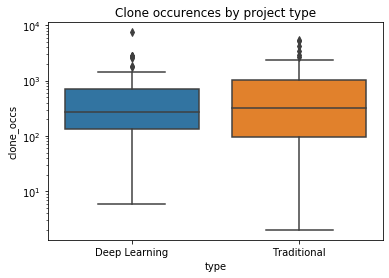

In [33]:
ml_trad_boxplot = sns.boxplot(x="type", y="clone_occs", data=clone_by_proj)
ml_trad_boxplot.set_yscale("log")
plt.title('Clone occurences by project type')

In [34]:
traditional = clone_by_proj[clone_by_proj['type']=='Traditional']
dl = clone_by_proj[clone_by_proj['type']=='Deep Learning']

In [35]:
stats.mannwhitneyu(traditional.clone_occs,dl.clone_occs)

MannwhitneyuResult(statistic=1673.5, pvalue=0.42007346155156755)

there is no significant statisticaly difference pvalue >0.05

type 1


MannwhitneyuResult(statistic=1012.5, pvalue=0.09628727867911474)

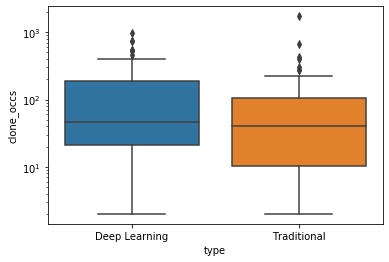

In [36]:
i = 0
clone_type = clone_by_type['clone_type'].unique()[i]
print(clone_type)
smell_data=clone_by_type[clone_by_type['clone_type']==clone_type]
ml_trad_boxplot = sns.boxplot(x="type", y="clone_occs", data=smell_data)
ml_trad_boxplot.set_yscale("log")
dl_repos_smells = smell_data[smell_data['type']=='Traditional']
trad_repos_smells = smell_data[smell_data['type']=='Deep Learning']
stats.mannwhitneyu(dl_repos_smells.clone_occs,trad_repos_smells.clone_occs)

In [37]:
clone_type = clone_by_type['clone_type'].unique()[i]

In [38]:
smell_data

,repoName,type,clone_type,clone_occs
0,BerryNet,Deep Learning,type 1,136
5,DeepCTR,Deep Learning,type 1,54
9,DeepLabCut,Deep Learning,type 1,207
12,DeepPavlov,Deep Learning,type 1,40
15,DeepVideoAnalytics,Deep Learning,type 1,95
...,...,...,...,...
301,wagtail,Traditional,type 1,658
304,waifu2x-chainer,Deep Learning,type 1,16
306,webpy,Traditional,type 1,29
309,yapf,Traditional,type 1,19


## By project size

In [65]:
import numpy as np

In [40]:
# get repos size info
repos_size = pd.read_csv("data/slocs_data.csv")

In [60]:
# Merge 
repos_smells_size = pd.merge(clone_by_type,repos_size,how='left', on=['repoName'])

In [61]:
repos_smells_size = repos_smells_size[repos_smells_size['total_sloc'] !=0]

In [62]:
repos_smells_size['normalization_occs'] = repos_smells_size['clone_occs']/repos_smells_size['total_sloc']

In [66]:
repos_smells_size['normalization_occs_log'] = repos_smells_size['clone_occs']/np.log(repos_smells_size['total_sloc'])

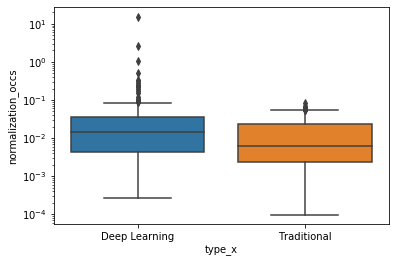

In [67]:
ml_trad_boxplot_1 = sns.boxplot(x="type_x", y="normalization_occs", data=repos_smells_size)
ml_trad_boxplot_1.set_yscale("log")

In [68]:
traditional = repos_smells_size[repos_smells_size['type_x']=='Traditional']
dl = repos_smells_size[repos_smells_size['type_x']=='Deep Learning']

In [69]:
stats.mannwhitneyu(traditional.normalization_occs,dl.normalization_occs)

MannwhitneyuResult(statistic=9252.0, pvalue=4.979745390481221e-05)

In [70]:
repos_smells_size

,repoName,type_x,clone_type,clone_occs,Unnamed: 0,type_y,total_sloc,normalization_occs,normalization_occs_log
0,BerryNet,Deep Learning,type 1,136,253.0,Deep-Learning,406.0,0.334975,22.642691
1,BerryNet,Deep Learning,type 2,36,253.0,Deep-Learning,406.0,0.088670,5.993654
2,BerryNet,Deep Learning,type 3,208,253.0,Deep-Learning,406.0,0.512315,34.629998
3,CommonMark,Traditional,type 2,2,0.0,Traditional,342.0,0.005848,0.342770
4,CommonMark,Traditional,type 3,2,0.0,Traditional,342.0,0.005848,0.342770
...,...,...,...,...,...,...,...,...,...
310,yapf,Traditional,type 2,13,67.0,Traditional,15837.0,0.000821,1.344350
311,yapf,Traditional,type 3,444,67.0,Traditional,15837.0,0.028036,45.914707
312,yowsup,Traditional,type 1,11,69.0,Traditional,11423.0,0.000963,1.177304
313,yowsup,Traditional,type 2,108,69.0,Traditional,11423.0,0.009455,11.558981


type 1


MannwhitneyuResult(statistic=592.0, pvalue=8.693269776898735e-06)

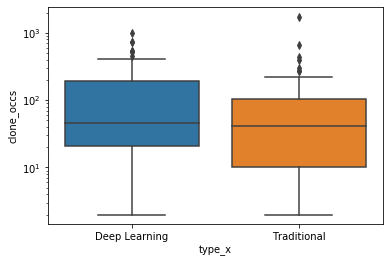

In [71]:
i = 0
clone_type = repos_smells_size['clone_type'].unique()[i]
print(clone_type)
smell_data=repos_smells_size[repos_smells_size['clone_type']==clone_type]
ml_trad_boxplot = sns.boxplot(x="type_x", y="clone_occs", data=smell_data)
ml_trad_boxplot.set_yscale("log")
dl_repos_smells = smell_data[smell_data['type_x']=='Traditional']
trad_repos_smells = smell_data[smell_data['type_x']=='Deep Learning']
stats.mannwhitneyu(dl_repos_smells.normalization_occs,trad_repos_smells.normalization_occs)

type 2


MannwhitneyuResult(statistic=988.0, pvalue=0.03571500795569359)

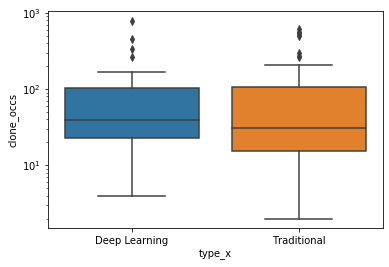

In [72]:
i = 1
clone_type = repos_smells_size['clone_type'].unique()[i]
print(clone_type)
smell_data=repos_smells_size[repos_smells_size['clone_type']==clone_type]
ml_trad_boxplot = sns.boxplot(x="type_x", y="clone_occs", data=smell_data)
ml_trad_boxplot.set_yscale("log")
dl_repos_smells = smell_data[smell_data['type_x']=='Traditional']
trad_repos_smells = smell_data[smell_data['type_x']=='Deep Learning']
stats.mannwhitneyu(dl_repos_smells.normalization_occs,trad_repos_smells.normalization_occs)

In [59]:
 repos_smells_size['clone_type'].unique()


array(['type 1'], dtype=object)

type 3


MannwhitneyuResult(statistic=1450.0, pvalue=0.07779003852819952)

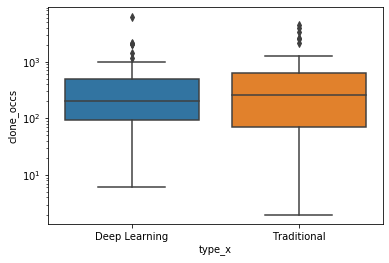

In [73]:
i = 2
clone_type = repos_smells_size['clone_type'].unique()[i]
print(clone_type)
smell_data=repos_smells_size[repos_smells_size['clone_type']==clone_type]
ml_trad_boxplot = sns.boxplot(x="type_x", y="clone_occs", data=smell_data)
ml_trad_boxplot.set_yscale("log")
dl_repos_smells = smell_data[smell_data['type_x']=='Traditional']
trad_repos_smells = smell_data[smell_data['type_x']=='Deep Learning']
stats.mannwhitneyu(dl_repos_smells.normalization_occs,trad_repos_smells.normalization_occs)